
#This markdown contains code for statistical analyses and figure generation of larval size throughout settlement  


In [ ]:
library(ggplot2)
library(dplyr)
library(vegan)
library(RVAideMemoire)
library(Rmisc)
library(lme4)
library(qqnorm)

In [2]:
############Impmorting MetaData
##Read in Larval Size MetaData file
LarvalSize_MetaData <- read.csv("LarvalSize_MetaData.csv")


#Subset and then rbind LB's with size through day 26 (i.e. exclude buckets that were removed during size separation)
LB2 <- subset(LarvalSize_MetaData, LB == "2")
LB3 <- subset(LarvalSize_MetaData, LB == "3")
LB5 <- subset(LarvalSize_MetaData, LB == "5")
LB8 <- subset(LarvalSize_MetaData, LB == "8")
LB10 <- subset(LarvalSize_MetaData, LB == "10")
LB12 <- subset(LarvalSize_MetaData, LB == "12")
Settled_Size <- rbind(LB2, LB3, LB5, LB8, LB10, LB12 )


In [3]:
#Assessing influence of treatment on larval shell length (with LB as a random effect), using an ANOVA

#First log-transform larval size,as residuals are not normally distributed
Settled_Size$LogLength <- log(Settled_Size$Length)

#Model including fixed effect of day and treatment
SettledSize_Treatment.model <- lmer(LogLength ~ Day + Treatment + (1 | LB),
                         data=Settled_Size, REML = FALSE)


#Null model w/o Treatment!
SettledSize_Treatment_null.model <- lmer(LogLength ~ Day + (1 | LB), 
                               data = Settled_Size, REML = FALSE)


#Use anova to conduct likelihood ratio test of null vs. model
anova(SettledSize_Treatment_null.model, SettledSize_Treatment.model)

##Significant effect of treatment on larval size throughout growing period







,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
SettledSize_Treatment_null.model,4,-3000.274,-2979.051,1504.137,-3008.274,NA,NA,NA
SettledSize_Treatment.model,5,-3003.113,-2976.583,1506.556,-3013.113,4.838779,1,0.0278266


In [4]:
#Now looking for influence of Day*Treatment interaction
##to discern treatment by day interaction, ask whether AIC value differs between the this and above
SettledSize_interaction.model <- lmer(LogLength ~ Day + Treatment + Day*Treatment + (1 | LB),
                         data=Settled_Size, REML = FALSE)

SettledSize_interaction.model


SettledSize_interaction.null  <- lmer(LogLength ~ Day + Treatment + (1 | LB),  
                    data=Settled_Size, REML=FALSE) 

SettledSize_interaction.null

anova(SettledSize_interaction.null, SettledSize_interaction.model)

##Significant effect of interaction of treatment and day on larval size throughout growing period


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: LogLength ~ Day + Treatment + Day * Treatment + (1 | LB)
   Data: Settled_Size
      AIC       BIC    logLik  deviance  df.resid 
-3016.623 -2984.788  1514.312 -3028.623      1483 
Random effects:
 Groups   Name        Std.Dev.
 LB       (Intercept) 0.01895 
 Residual             0.08707 
Number of obs: 1489, groups:  LB, 6
Fixed Effects:
     (Intercept)               Day      TreatmentLow  Day:TreatmentLow  
         4.60968           0.01862          -0.07423           0.00200  

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: LogLength ~ Day + Treatment + (1 | LB)
   Data: Settled_Size
      AIC       BIC    logLik  deviance  df.resid 
-3003.113 -2976.584  1506.556 -3013.113      1484 
Random effects:
 Groups   Name        Std.Dev.
 LB       (Intercept) 0.01899 
 Residual             0.08753 
Number of obs: 1489, groups:  LB, 6
Fixed Effects:
 (Intercept)           Day  TreatmentLow  
     4.59341       0.01972      -0.04413  

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
SettledSize_interaction.null,5,-3003.113,-2976.583,1506.556,-3013.113,NA,NA,NA
SettledSize_interaction.model,6,-3016.623,-2984.788,1514.312,-3028.623,15.5104,1,8.205246e-05


In [ ]:

####Figure generation############



In [5]:
##First, import subsetted dataframes of larval size on each sampling day
#Day 3
Day3Size <- read.csv("Day3_Size_MetaData.csv")
Day3High <- subset(Day3Size, Treatment == "High")
Day3Low <- subset(Day3Size, Treatment == "Low")
Day3Size_SummStats <- summarySE(data = Day3Size, measurevar = "Length", groupvars = c("Treatment", "LB"))
#Day 7
Day7Size <- read.csv("Day7_Size_MetaData.csv")
Day7High <- subset(Day7Size, Treatment == "High")
Day7Low <- subset(Day7Size, Treatment == "Low")
Day7Size_SummStats <- summarySE(data = Day7Size, measurevar = "Length", groupvars = c("Treatment", "LB"))
#Day 14
Day14Size <- read.csv("Day14_Size_MetaData.csv")
Day14High <- subset(Day14Size, Treatment == "High")
Day14Low <- subset(Day14Size, Treatment == "Low")
Day14Size_SummStats <- summarySE(data = Day14Size, measurevar = "Length", groupvars = c("Treatment", "LB"))
#Day 26
Day26Size <- read.csv("Day26_Size_MetaData.csv")
Day26High <- subset(Day26Size, Treatment == "High")
Day26Low <- subset(Day26Size, Treatment == "Low")
Day26Size_SummStats <- summarySE(data = Day26Size, measurevar = "Length", groupvars = c("LB","Treatment"))

Saving 7 x 7 in image


Saving 7 x 7 in image


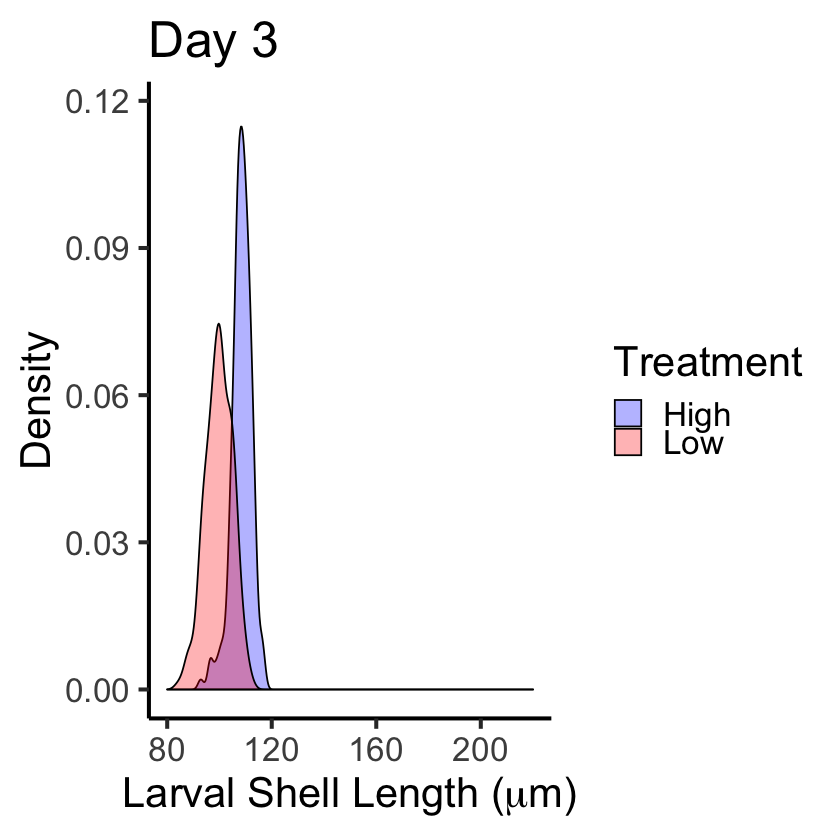

Saving 7 x 7 in image


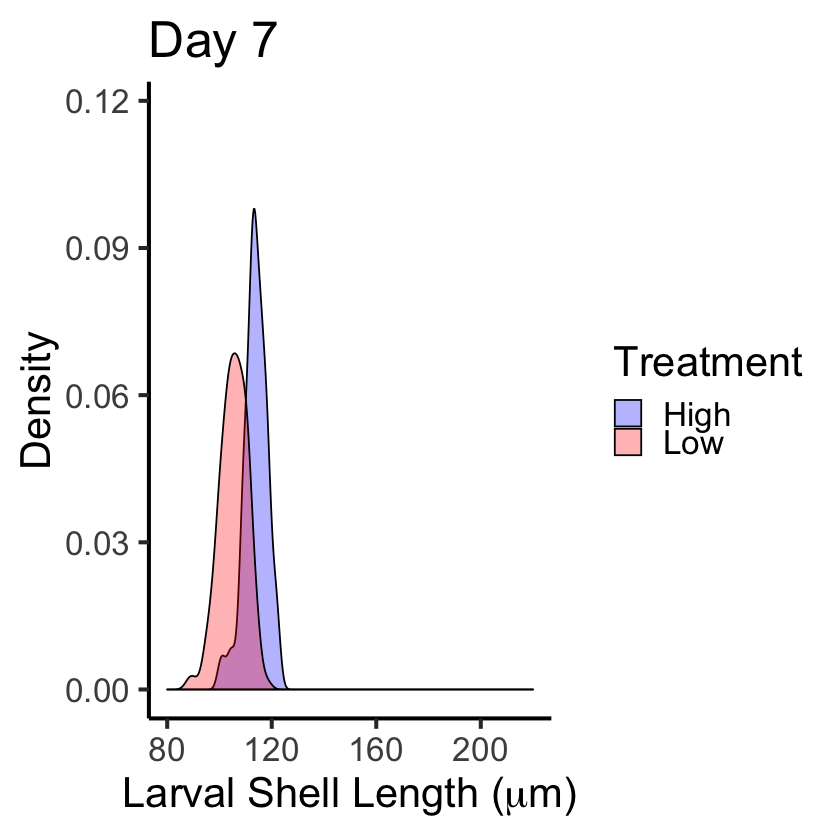

Saving 7 x 7 in image
Warning message:
“Removed 2 rows containing non-finite values (stat_density).”Warning message:
“Removed 2 rows containing non-finite values (stat_density).”

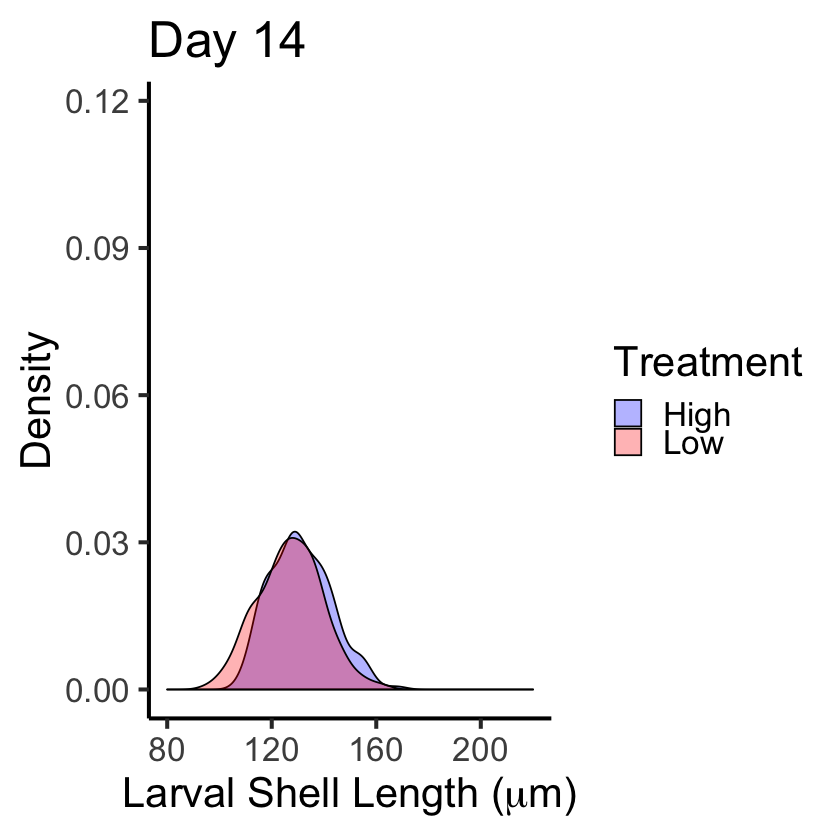

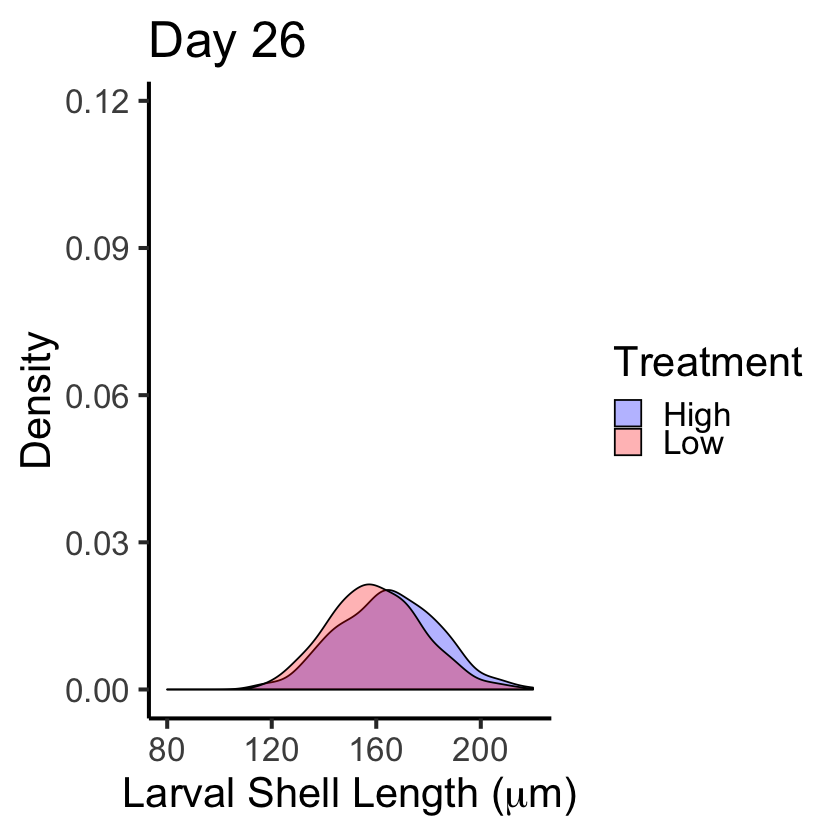

In [6]:
#Larval size distributions throughout experiment (Figure 2 in manuscript)
#Day3
Density_Day3_BothTreatments <- ggplot(Day3Size, aes(x = Length)) +
  geom_density(aes(group = Treatment, fill = Treatment), alpha = 0.3) +
  scale_fill_manual(values = c("blue", "red")) +
  xlim(80, 220) +
  ylim(0, 0.118) +
  xlab(expression(paste("Larval Shell Length (", mu, "m)"))) +
  ylab("Density") +
  ggtitle("Day 3") +
  theme_classic(base_size = 25)

#Day7
Density_Day7_BothTreatments <- ggplot(Day7Size, aes(x = Length)) +
  geom_density(aes(group = Treatment, fill = Treatment), alpha = 0.3) +
  scale_fill_manual(values = c("blue", "red")) +
  xlim(80, 220) +
  ylim(0, 0.118) +
  xlab(expression(paste("Larval Shell Length (", mu, "m)"))) +
  ylab("Density") +
  ggtitle("Day 7") +
  theme_classic(base_size = 25)
#Day14
Density_Day14_BothTreatments <- ggplot(Day14Size, aes(x = Length)) +
  geom_density(aes(group = Treatment, fill = Treatment), alpha = 0.3) +
  scale_fill_manual(values = c("blue", "red")) +
  xlim(80, 220) +
  ylim(0, 0.118) +
  xlab(expression(paste("Larval Shell Length (", mu, "m)"))) +   
  ylab("Density") +
  ggtitle("Day 14") +
  theme_classic(base_size = 25)
#Day26
Density_Day26_BothTreatments <- ggplot(Day26Size, aes(x = Length)) +
  geom_density(aes(group = Treatment, fill = Treatment), alpha = 0.3) +
  scale_fill_manual(values = c("blue", "red")) +
  xlim(80, 220) +
  ylim(0, 0.118) +
  xlab(expression(paste("Larval Shell Length (", mu, "m)"))) +   
  ylab("Density") +
  ggtitle("Day 26") +
  theme_classic(base_size = 25)
